In [36]:
from adjustText import adjust_text
from matplotlib.colors import TwoSlopeNorm
from scipy.stats import kendalltau, pearsonr
import geopandas as gpd
import libpysal
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import seaborn as sns

from epitools import get_data

In [37]:
gdf = gpd.read_file(f"geo_shapes/France_department.gpkg")
gdf.head()

,department_id,department,geometry
0,01,Ain,"POLYGON ((4.78021 46.17668, 4.79458 46.21832, ..."
1,02,Aisne,"POLYGON ((4.04797 49.40564, 4.03991 49.39740, ..."
2,03,Allier,"POLYGON ((3.03207 46.79491, 3.04907 46.75808, ..."
3,04,Alpes-de-Haute-Provence,"POLYGON ((5.67604 44.19143, 5.69209 44.18648, ..."
4,05,Hautes-Alpes,"POLYGON ((6.26057 45.12685, 6.29922 45.10855, ..."


In [40]:
asd = pd.read_csv(f"data_output/France/{2022}_divisiveness_department_id_nv_first_round.csv.gz")
asd[asd["department_id"] == "31"]

,candidate,value,weight,type,department_id
434,Emmanuel MACRON,0.113632,0.291565,Between,31
435,Jean LASSALLE,0.126696,0.052587,Between,31
436,Jean-Luc MÉLENCHON,0.111300,0.279937,Between,31
437,Marine LE PEN,0.121198,0.197508,Between,31
438,Valérie PÉCRESSE,0.126070,0.040246,Between,31
439,Yannick JADOT,0.127158,0.063140,Between,31
440,Éric ZEMMOUR,0.127805,0.075018,Between,31
441,Emmanuel MACRON,0.008120,0.291565,Within,31
442,Jean LASSALLE,0.004881,0.052587,Within,31
443,Jean-Luc MÉLENCHON,0.014947,0.279937,Within,31


In [41]:
output = []
method = "nv"
country_output = []

for year in [2002, 2007, 2012, 2017, 2022]:
    print(year)
    df_dv = get_data(
        country="France",
        year=year,
        election="first_round",
        aggregation="department_id",
        method="nv"
    )
    
    output.append(df_dv)
    
df_dv = pd.concat(output, ignore_index=True)
df_dv["department_id"] = df_dv["department_id"].astype(str).str.zfill(2)
df_dv = df_dv[~df_dv["department_id"].isin(["2A", "2B"])]
df_dv.head()

2002
2007
2012
2017
2022


,department_id,epi,epi_between,epi_within,year
0,01,0.943157,0.919399,0.023758,2002
1,02,0.942140,0.913525,0.028615,2002
2,03,0.949561,0.922506,0.027055,2002
3,04,0.956787,0.928523,0.028263,2002
4,05,0.960310,0.932474,0.027837,2002


In [22]:
df_dv["polarization"] = df_dv["epi_between"] / df_dv["epi_within"]
df_dv

,department_id,epi,epi_between,epi_within,year,alternative,polarization
0,01,0.943157,0.919399,0.023758,2002,0.974810,38.697874
1,02,0.942140,0.913525,0.028615,2002,0.969628,31.924880
2,03,0.949561,0.922506,0.027055,2002,0.971508,34.097911
3,04,0.956787,0.928523,0.028263,2002,0.970460,32.852616
4,05,0.960310,0.932474,0.027837,2002,0.971013,33.498098
...,...,...,...,...,...,...,...
507,91,0.890755,0.841690,0.049065,2022,0.944917,17.154499
508,92,0.882608,0.827138,0.055470,2022,0.937152,14.911471
509,93,0.853808,0.806312,0.047495,2022,0.944372,16.976659
510,94,0.884728,0.832348,0.052380,2022,0.940795,15.890460


In [5]:
df_dv.value_counts("year")

year
2012    106
2017    105
2022    105
2007     99
2002     98
dtype: int64

In [6]:
# df_dv.sort_values("year")

In [42]:
dd = df_dv.pivot_table(index="department_id", columns="year", values="epi").reset_index()
dd.columns = ["department_id", 2002, 2007, 2012, 2017, 2022]
years = list(df_dv.year.unique())
corr_year = dd.values

In [8]:
# dd

In [43]:
df_country = pd.DataFrame(country_output)
df_country["department_id"] = "FR"
df_country.head()

,department_id


In [44]:
df_dv.max()

department_id          ZZ
epi               0.96031
epi_between      0.932474
epi_within       0.122253
year                 2022
dtype: object

In [51]:
df_dv = df_dv[~df_dv["department_id"].str.contains("Z")]
df_dv["alternative"] = 1 - df_dv["epi_within"]/df_dv["epi"] 

C:\Users\cnava\AppData\Local\Temp\ipykernel_1392\3899601153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dv["alternative"] = 1 - df_dv["epi_within"]/df_dv["epi"]


In [52]:
df_dv[df_dv["epi_within"] == 0]

,department_id,epi,epi_between,epi_within,year,alternative


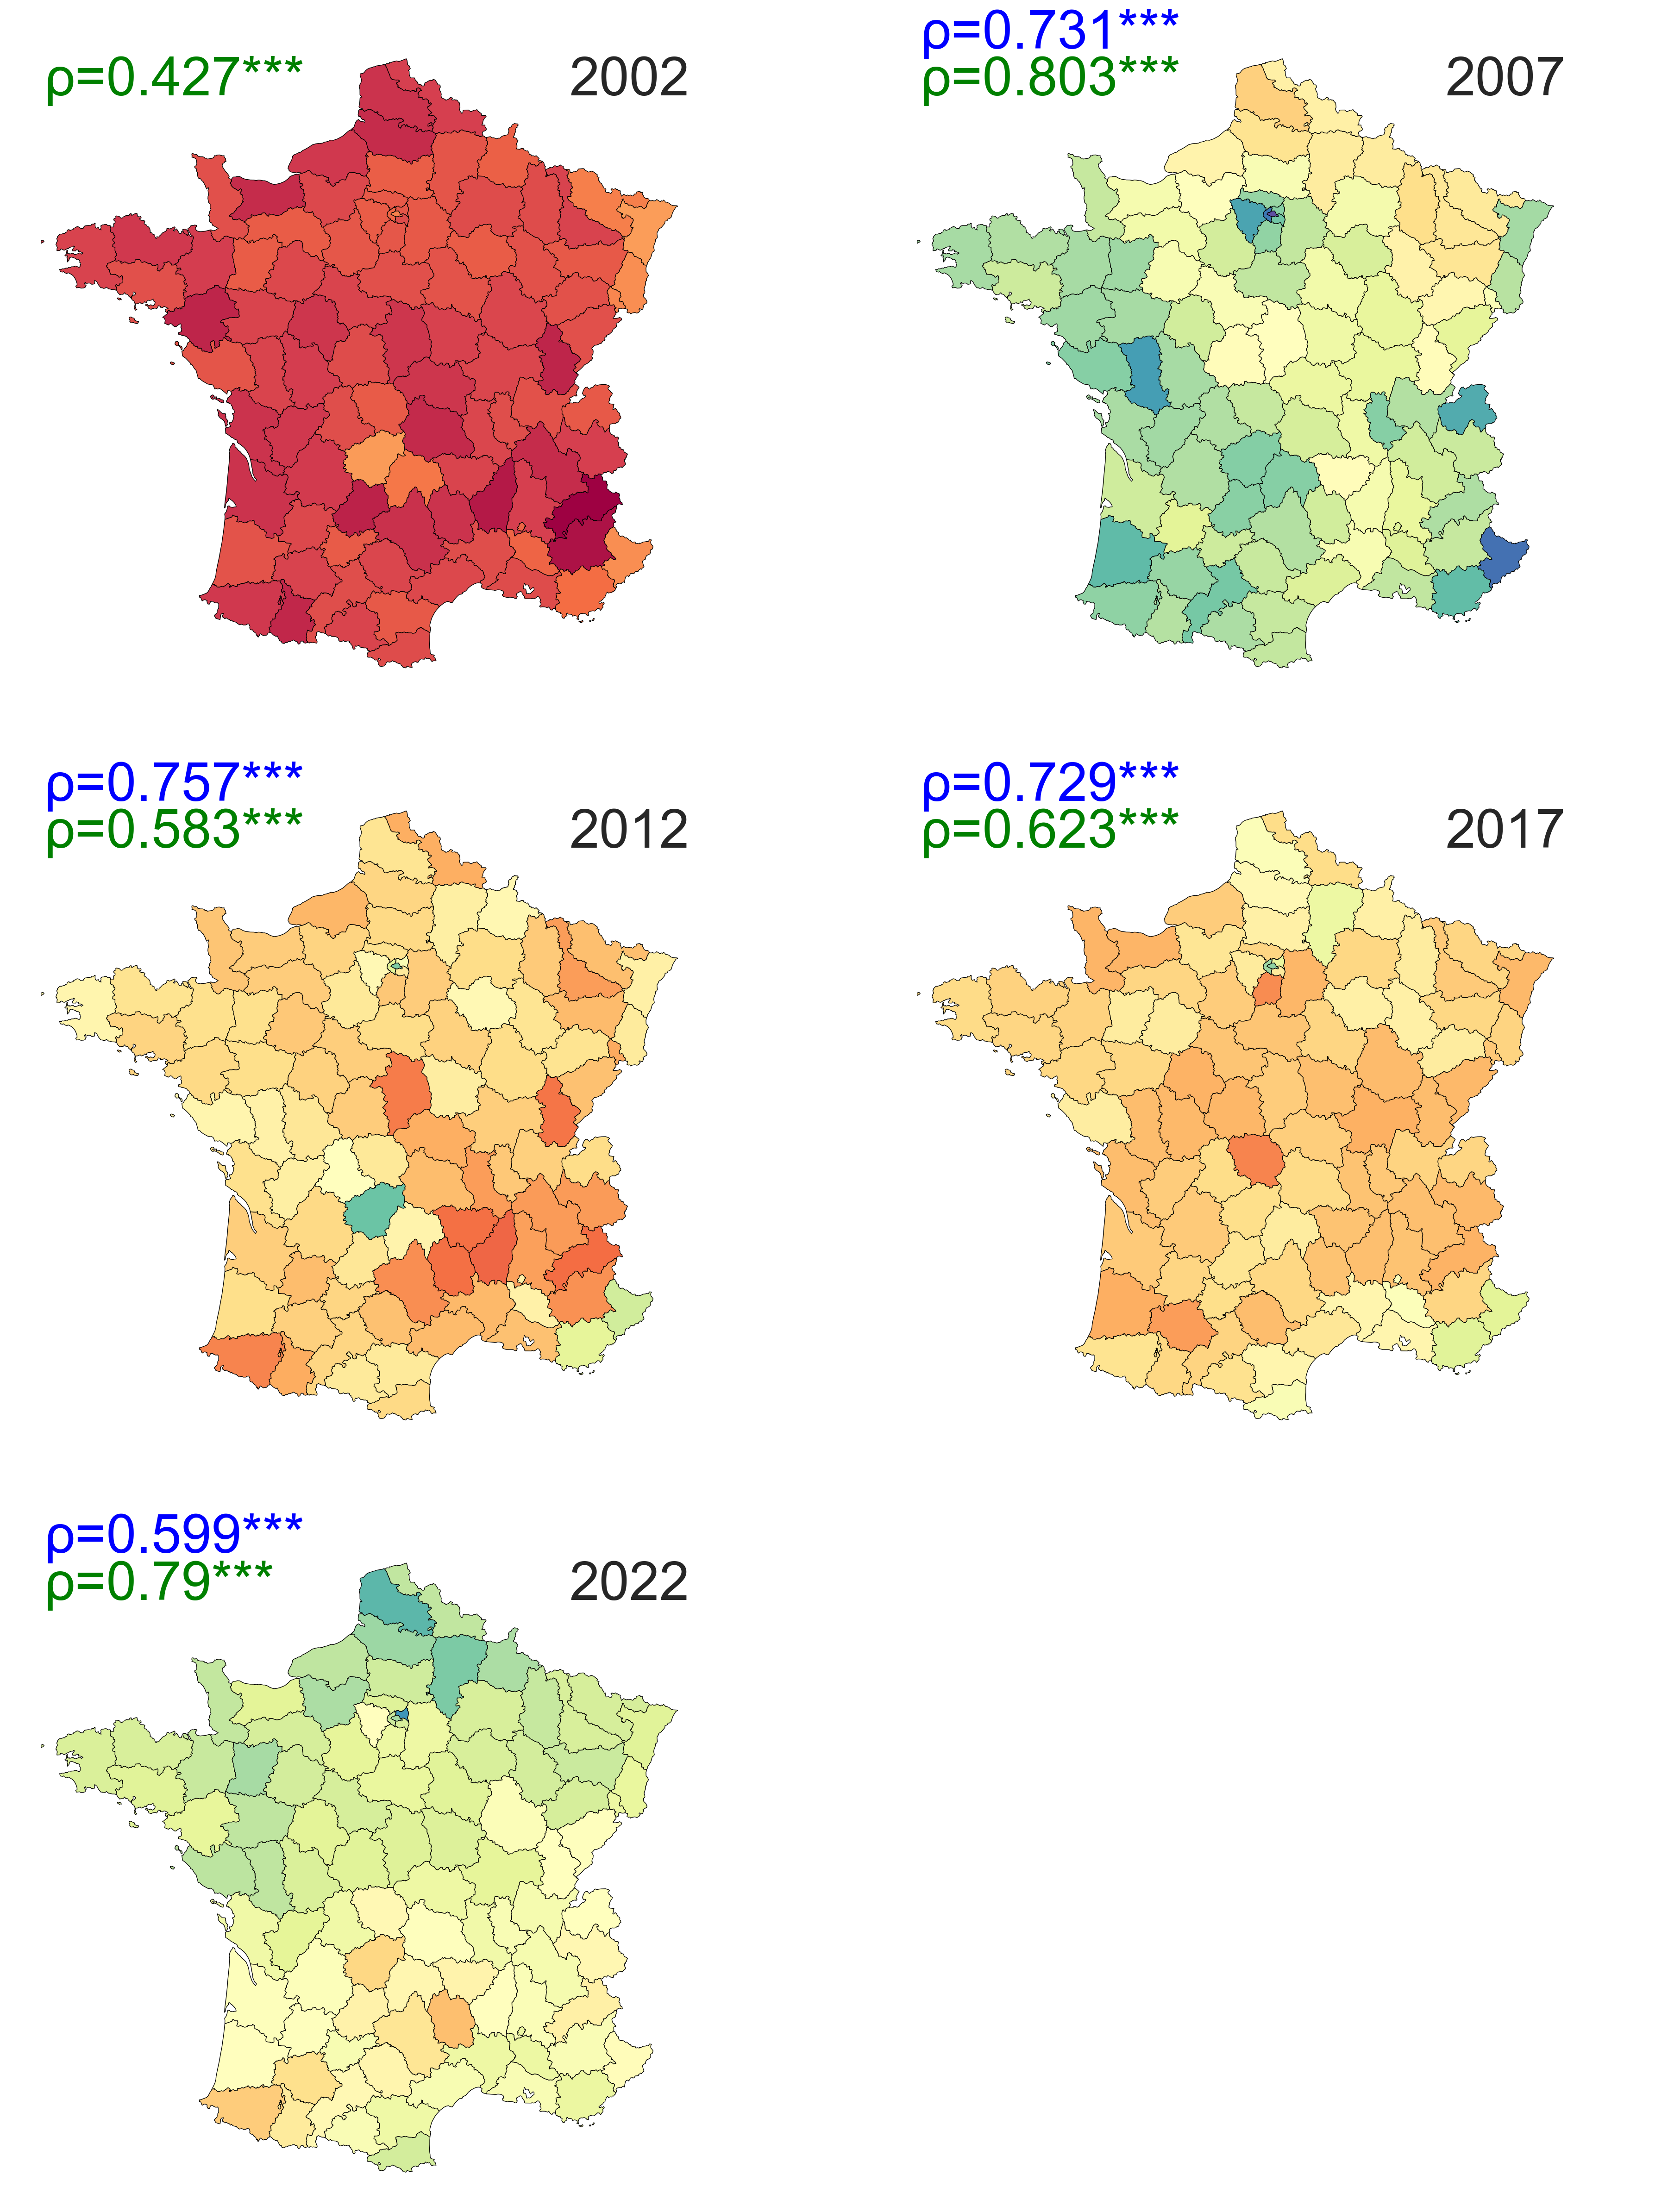

In [55]:
sns.set(font_scale=3.5, style="white")
measure_name = "epi"

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 25), dpi=200)
def set_corr(corr, _):
    corr = round(corr, 3)
    if _ < 0.01:
        return f"ρ={corr}***"
    elif _ < 0.05:
        return f"ρ={corr}**"
    elif _ < 0.1:
        return f"ρ={corr}*"
    return f"ρ={corr}"

for idx, year in enumerate([2002, 2007, 2012, 2017, 2022]):
    data_tmp = df_dv[df_dv["year"] == year]
    data_tmp = pd.merge(data_tmp, gdf, on="department_id")
    ax = axs[int(idx/2), idx%2]
    W = libpysal.weights.Queen.from_dataframe(data_tmp)
    W.transform = "r"
    data_tmp["sp_value"] = libpysal.weights.lag_spatial(W, data_tmp[measure_name])

    data_tmp = gpd.GeoDataFrame(data_tmp).dropna()

    data_tmp.plot(
        column=measure_name,
        edgecolor="black",
        vmin=df_dv[measure_name].min(),
        vmax=df_dv[measure_name].max(),
        lw=0.5,
        ax=ax, 
        cmap="Spectral_r",
        legend=False, 
        legend_kwds=dict(
            shrink=0.25
        )
    )

    corr, _ = pearsonr(data_tmp[measure_name], data_tmp["sp_value"])
    ax.text(0.05, 0.9, set_corr(corr, _), color="green", transform=ax.transAxes)

    if year > 2002:
        value = corr_year[years.index(year - 5), years.index(year)]
        tmp = dd[[year - 5, year]].copy().dropna()
        corr, _ = pearsonr(tmp[year - 5], tmp[year])
        ax.text(0.05, 0.97, set_corr(corr, _), color="blue", transform=ax.transAxes)

    ax.axis("off")
    ax.text(0.8, 0.9, year, transform=ax.transAxes)

axs[2, 1].axis("off")

fig.tight_layout()

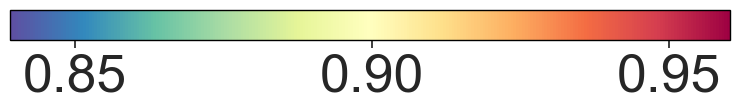

In [58]:
import pylab as pl
import numpy as np

measure_name = "epi"


a = np.array([[df_dv[measure_name].min(), df_dv[measure_name].max()]])
pl.figure(figsize=(9, 1.5))
img = pl.imshow(a, cmap="Spectral_r")
pl.gca().set_visible(False)
cax = pl.axes([0.1, 0.2, 0.8, 0.2])



cb = pl.colorbar(orientation="horizontal", cax=cax)
# cb.ax.set_xticklabels(["<0.2", "0.25", "0.3", "0.35", "0.4+"])
cb.outline.set_color("#000000")
cb.outline.set_linewidth(1)

In [15]:
# df_dv[df_dv["year"] == 2022].sort_values("value", ascending=False)

In [16]:
df_runoff = pd.read_csv("data_output/France/2022_runoff.csv.gz")
df_location = pd.read_csv(f"data_output/France/2022_runoff_location.csv.gz")
df_runoff = pd.merge(df_runoff, df_location, on="polling_id")
df_runoff.head()

C:\Users\cnava\AppData\Local\Temp\ipykernel_1392\1938106237.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_location = pd.read_csv(f"data_output/France/2022_runoff_location.csv.gz")


,polling_id,candidate,value,rank,rate,department_id,department,circunscription_id,circunscription,commune_id,commune,polling_place,electors,abstentions
0,01-1-0001,Emmanuel MACRON,237,1,0.526667,01,Ain,4,4ème circonscription,01001,L'Abergement-Clémenciat,0001,643,146
1,01-1-0001,Marine LE PEN,213,2,0.473333,01,Ain,4,4ème circonscription,01001,L'Abergement-Clémenciat,0001,643,146
2,01-2-0001,Emmanuel MACRON,94,1,0.661972,01,Ain,5,5ème circonscription,01002,L'Abergement-de-Varey,0001,213,45
3,01-2-0001,Marine LE PEN,48,2,0.338028,01,Ain,5,5ème circonscription,01002,L'Abergement-de-Varey,0001,213,45
4,01-4-0001,Emmanuel MACRON,360,1,0.503497,01,Ain,5,5ème circonscription,01004,Ambérieu-en-Bugey,0001,1130,322


In [17]:
df_runoff2 = df_runoff.groupby(["department_id", "candidate"]).agg({"value": "sum"})
df_runoff2["rate"] = df_runoff2.groupby(level=[0]).apply(lambda x: x/x.sum())
df_runoff2 = df_runoff2.reset_index()
df_runoff2 = df_runoff2.pivot(index="department_id", columns="candidate", values="rate").reset_index()
df_runoff2.columns = ["department_id", "a", "b"]
df_runoff2["diff"] = np.absolute(df_runoff2["a"] - df_runoff2["b"])
df_runoff2 = df_runoff2[~df_runoff2["department_id"].str.contains("Z")]
df_runoff2.head()

C:\Users\cnava\AppData\Local\Temp\ipykernel_1392\1511753059.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_runoff2["rate"] = df_runoff2.groupby(level=[0]).apply(lambda x: x/x.sum())


,department_id,a,b,diff
0,01,0.549941,0.450059,0.099883
1,02,0.400897,0.599103,0.198206
2,03,0.523544,0.476456,0.047089
3,04,0.485547,0.514453,0.028905
4,05,0.550659,0.449341,0.101319


In [18]:
pd.merge(df_runoff2, df_dv[df_dv["year"] == 2022], on="department_id").corr()

C:\Users\cnava\AppData\Local\Temp\ipykernel_1392\2513839250.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.merge(df_runoff2, df_dv[df_dv["year"] == 2022], on="department_id").corr()


,a,b,diff,epi,epi_between,epi_within,year,alternative
a,1.000000,-1.000000,0.873334,-0.009307,-0.161818,0.296342,NaN,-0.294370
b,-1.000000,1.000000,-0.873334,0.009307,0.161818,-0.296342,NaN,0.294370
diff,0.873334,-0.873334,1.000000,-0.239897,-0.353362,0.315215,NaN,-0.328907
epi,-0.009307,0.009307,-0.239897,1.000000,0.856084,-0.130602,NaN,0.199203
epi_between,-0.161818,0.161818,-0.353362,0.856084,1.000000,-0.624215,NaN,0.676979
epi_within,0.296342,-0.296342,0.315215,-0.130602,-0.624215,1.000000,NaN,-0.997517
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alternative,-0.294370,0.294370,-0.328907,0.199203,0.676979,-0.997517,NaN,1.000000


In [19]:
sns.scatterplot(x="diff", y="value", data = pd.merge(df_runoff2, df_dv[df_dv["year"] == 2022], on="department_id"))

ValueError: Could not interpret value `value` for parameter `y`

In [ ]:
df_inequality = pd.read_excel(
    "https://www.insee.fr/fr/statistiques/fichier/5371235/RPM2021-F18.xlsx",
    sheet_name="figure 2",
    header=2
).head(101)
df_inequality = df_inequality.rename(columns={"Code": "department_id", "Taux de pauvreté (en\xa0%)": "poverty_rate"})
df_inequality.head()

,department_id,Département,poverty_rate
0,01,Ain,10.3
1,02,Aisne,18.4
2,03,Allier,15.5
3,04,Alpes-de-Haute-Provence,16.8
4,05,Hautes-Alpes,13.9


In [ ]:
df_location = pd.read_csv(f"data_output/France/2022_first_round_location.csv.gz")
df_location = df_location.groupby(["department_id"]).agg({"electors": "sum", "abstentions": "sum"}).reset_index()
df_location["participation"] = 1 - df_location["abstentions"] / df_location["electors"]
df_location.head()

C:\Users\cnava\AppData\Local\Temp\ipykernel_9272\954207689.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_location = pd.read_csv(f"data_output/France/2022_first_round_location.csv.gz")


,department_id,electors,abstentions,participation
0,01,438109,97541,0.777359
1,02,373544,101089,0.729379
2,03,249991,58497,0.766004
3,04,128075,29290,0.771306
4,05,113519,25357,0.776628


In [ ]:
df_location2 = pd.read_csv(f"data_output/France/2022_runoff_location.csv.gz")
df_location2 = df_location2.groupby(["department_id"]).agg({"electors": "sum", "abstentions": "sum"}).reset_index()
df_location2["participation2"] = 1 - df_location2["abstentions"] / df_location2["electors"]
df_location2.head()

C:\Users\cnava\AppData\Local\Temp\ipykernel_9272\1908648492.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_location2 = pd.read_csv(f"data_output/France/2022_runoff_location.csv.gz")


,department_id,electors,abstentions,participation2
0,01,438250,109568,0.749987
1,02,373621,97965,0.737796
2,03,249954,62311,0.750710
3,04,128077,31907,0.750876
4,05,113540,27296,0.759591


In [ ]:
df_poverty = pd.read_excel("data_external/France/poverty_2017.xlsx", sheet_name="Figure 3", header=2).dropna()
df_poverty["Taux de pauvreté"] = df_poverty["Taux de pauvreté"].astype(float) / 100
df_poverty = df_poverty.rename(columns={"Code": "department_id", "Département": "department", "Taux de pauvreté": "poverty_rate"})
df_poverty.head()

,department_id,department,poverty_rate
0,74,Haute-Savoie,0.091
1,85,Vendée,0.093
2,78,Yvelines,0.094
3,73,Savoie,0.098
4,44,Loire-Atlantique,0.101


In [ ]:
dd = pd.merge(df_dv[df_dv["year"] == 2022], df_poverty, on="department_id")
dd = pd.merge(dd, df_location[["department_id", "participation"]], on="department_id")
dd = pd.merge(dd, df_location2[["department_id", "participation2"]], on="department_id")

dd = dd[~dd["department_id"].isin(["2A", "2B"])]
# dd = dd[["value", "poverty_rate", "participation", "participation2"]]


In [ ]:
pd.read_csv("data_external/France/Insee/meta_FILO2019_DEC_DEP.csv", encoding="utf-8", delimiter=";").head()

,COD_VAR,LIB_VAR,LIB_VAR_LONG,COD_MOD,LIB_MOD,TYPE_VAR,LONG_VAR
0,NBMEN19,Nbre de ménages fiscaux,Nombre de ménages fiscaux,NaN,NaN,NUM,7
1,NBPERS19,Nbre de personnes dans les ménages fiscaux,Nombre de personnes dans les ménages fiscaux,NaN,NaN,NUM,7
2,NBUC19,Nbre d'unités de consommation dans les ménages...,Nombre d'unités de consommation dans les ménag...,NaN,NaN,NUM,9
3,PMIMP19,Part des ménages fiscaux imposés (%),Part des ménages fiscaux imposés (%),NaN,NaN,NUM,4
4,Q119,1er quartile (€),1er quartile (€),NaN,NaN,NUM,5


In [ ]:
df_stats = pd.read_csv("data_external/France/Insee/FILO2019_DEC_DEP.csv", encoding="utf-8", delimiter=";")
df_stats = df_stats.rename(columns={"CODGEO": "department_id", "GI19": "gini"})
df_stats

,department_id,NBMEN19,NBPERS19,NBUC19,PMIMP19,Q119,Q219,Q319,Q3_Q1,D119,...,OPR5D919,OPR5RD,OPR5S80S2019,OPR5GI19,OPR5PACT19,OPR5PTSA19,OPR5PCHO19,OPR5PBEN19,OPR5PPEN19,OPR5PAUT19
0,01,265876,632800,425987.3,59.6,16150,23250,32800,16650,9380,...,104710,NaN,6337.5,0.692,18.0,16.0,0.9,1.1,11.5,70.5
1,02,223756,513384,351009.0,49.5,12120,19030,26170,14050,5700,...,97100,3883.8,141.9,0.568,15.8,11.5,0.8,3.5,16.6,67.6
2,03,159016,326409,233659.1,49.0,13460,19720,26590,13130,6840,...,84990,NaN,28446.5,0.641,16.1,13.8,0.9,1.4,16.4,67.5
3,04,74172,154335,109862.7,51.5,13370,20140,28160,14800,7120,...,68940,67.2,61.2,0.634,11.1,8.8,0.8,1.5,8.9,80.0
4,05,64721,134710,95836.5,54.2,14350,20560,27930,13580,8610,...,83210,56.0,36.1,0.503,18.6,13.8,1.5,3.3,15.0,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,93,601846,1600460,1029621.7,54.9,8920,16410,26270,17360,3880,...,81780,NaN,1173.4,0.647,20.9,17.3,1.8,1.8,9.6,69.5
94,94,565806,1363385,911777.8,67.7,13440,23280,35680,22240,6640,...,142690,832.8,109.0,0.604,18.3,15.7,1.1,1.5,10.8,70.9
95,95,466919,1256247,807878.2,66.0,13070,22030,32110,19040,6740,...,125140,1017.4,101.4,0.595,20.1,17.0,1.5,1.6,10.9,69.0
96,972,149609,324588,227771.5,39.2,8110,16690,27350,19240,1540,...,73020,NaN,NaN,0.819,19.0,15.5,0.9,2.6,8.3,72.7


In [ ]:
# https://www.insee.fr/fr/statistiques/2012717
df_income = pd.read_excel(
    "https://www.insee.fr/fr/statistiques/fichier/2012717/TCRD_022.xlsx",
    header=4
)
df_income = df_income.rename(columns={
    "Unnamed: 0": "department_id",
    "Unnamed: 1": "department",
    "Nombre": "number_households",
    "Part des ménages fiscaux imposés (en %)": "fraction_taxed",
    "Médiane": "median_household_income"
}).dropna()

In [ ]:
# https://www.insee.fr/fr/statistiques/4806684
df_rurality = pd.read_excel(
    "https://www.insee.fr/fr/statistiques/fichier/4806684/if210.xlsx",
    sheet_name="Figure 2"
).dropna()
df_rurality = df_rurality.rename(columns={
    "Figure 2 - Part de la population française en 2017 vivant dans une unité urbaine": "department_id",
    "Unnamed: 1": "department",
    "Unnamed: 2": "urban"
})
df_rurality["rurality"] = 1 - df_rurality["urban"]/100
df_rurality.head()

,department_id,department,urban,rurality
1,01,Ain,67,0.33
2,02,Aisne,53.2,0.468
3,03,Allier,58.3,0.417
4,04,Alpes-de-Haute-Provence,61.9,0.381
5,05,Hautes-Alpes,59.5,0.405


In [ ]:
year = 2022

data = pd.merge(
    df_poverty,
    df_dv[df_dv["year"] == year],
    on="department_id"
)

data = pd.merge(
    data,
    df_stats,
    on="department_id"
)

data = pd.merge(
    data,
    df_income,
    on="department_id"
)

data = pd.merge(
    data,
    df_rurality,
    on="department_id"
)
data.head()

,department_id,department_x,poverty_rate,value,year,NBMEN19,NBPERS19,NBUC19,PMIMP19,Q119,...,OPR5PAUT19,department_y,number_households,fraction_taxed,median_household_income,1er décile (D1),9e décile (D9),department,urban,rurality
0,74,Haute-Savoie,0.091,11.148693,2022,349755,798144,545337.2,62.5,18250,...,70.4,Haute-Savoie,348025.0,62.5,26540.0,13450.0,56930.0,Haute-Savoie,86.4,0.136
1,85,Vendée,0.093,11.062862,2022,307017,691931,477643.5,53.8,15950,...,70.7,Vendée,306763.0,53.8,21550.0,13490.0,33970.0,Vendée,67.7,0.323
2,78,Yvelines,0.094,11.163978,2022,580809,1462552,965243.2,74.5,17920,...,70.2,Yvelines,579650.0,74.5,26970.0,13220.0,51570.0,Yvelines,93,0.07
3,73,Savoie,0.098,11.184412,2022,193293,427682,296856.3,63.5,16460,...,69.2,Savoie,193116.0,63.5,23210.0,13110.0,39150.0,Savoie,77.2,0.228
4,44,Loire-Atlantique,0.101,11.152132,2022,618976,1407557,963483.0,59.5,16190,...,71.5,Loire-Atlantique,618356.0,59.5,22910.0,13110.0,38310.0,Loire-Atlantique,84.6,0.154


In [ ]:
VOTES_POLLING = 100
RATE_THRESHOLD = 0.02
output = []

method = "nv"
for country, year, geography in [
    ("France", 2002, "department_id"),
    ("France", 2007, "department_id"),
    ("France", 2012, "department_id"),
    ("France", 2017, "department_id"),
    ("France", 2022, "department_id"),
    ("United States", 2000, "county"),
    ("United States", 2004, "county"),
    ("United States", 2008, "county"),
    ("United States", 2012, "county"),
    ("United States", 2016, "state"),
    ("United States", 2020, "state"),
    # ("Chile", 2013, "province"),
    # ("Chile", 2017, "province"),
    # ("Chile", 2021, "province")
]:
    df = pd.read_csv(f"data_output/{country}/{year}_first_round.csv.gz")
    ee = df.groupby("polling_id").agg({"value": "sum"})
    values_polling = list(ee[ee["value"] > VOTES_POLLING].index.unique())
    dd = df.groupby("candidate").agg({"value": "sum"})
    dd["rate"] = dd.apply(lambda x: x/x.sum())
    values = list(dd[dd["rate"] > RATE_THRESHOLD].index.unique())

    df = df[df["polling_id"].isin(values_polling)].copy()
    df = df[df["candidate"].isin(values)].copy()

    N = len(df["candidate"].unique())
    print(N)

    value = df.groupby("candidate").agg({"rate": "std"}).sum()["rate"]

    output.append({
        "country": country,
        "year": year,
        "N": N,
        "value": value
    })

13
6
6
6
9
3
2
2
3
3
2


In [ ]:
data[["value", "poverty_rate", "gini", "median_household_income", "rurality"]].to_csv("data_regressions/factors_fra.csv", index=False)

In [ ]:
VOTES_POLLING = 100
RATE_THRESHOLD = 0.02
output = []

method = "nv"
for year in [2002, 2007, 2012, 2017, 2022]:
    df = pd.read_csv(f"data_output/France/{year}_first_round.csv.gz")
    df_location = pd.read_csv(f"data_output/France/{year}_first_round_location.csv.gz")

    for unit in ["department_id", "commune", "polling_id"]:
        if unit != "polling_id":
            df = pd.merge(df, df_location[[unit, "polling_id"]], on="polling_id")

        ee = df.groupby(unit).agg({"value": "sum"})
        values_polling = list(ee[ee["value"] > VOTES_POLLING].index.unique())
        dd = df.groupby("candidate").agg({"value": "sum"})
        dd["rate"] = dd.apply(lambda x: x/x.sum())
        values = list(dd[dd["rate"] > RATE_THRESHOLD].index.unique())

        df = df[df[unit].isin(values_polling)].copy()
        df = df[df["candidate"].isin(values)].copy()

        tt = df.groupby([unit, "candidate"]).agg({"value": "sum"})
        tt["rate"] = tt.groupby(level=[0], group_keys=False).apply(lambda x: x/x.sum())
        tt = tt.reset_index()
        tt = tt[[unit, "candidate", "rate"]]

        value = tt.groupby("candidate").agg({"rate": "std"}).sum()["rate"]

        output.append({
            "year": year,
            "unit": unit,
            "value": value
        })

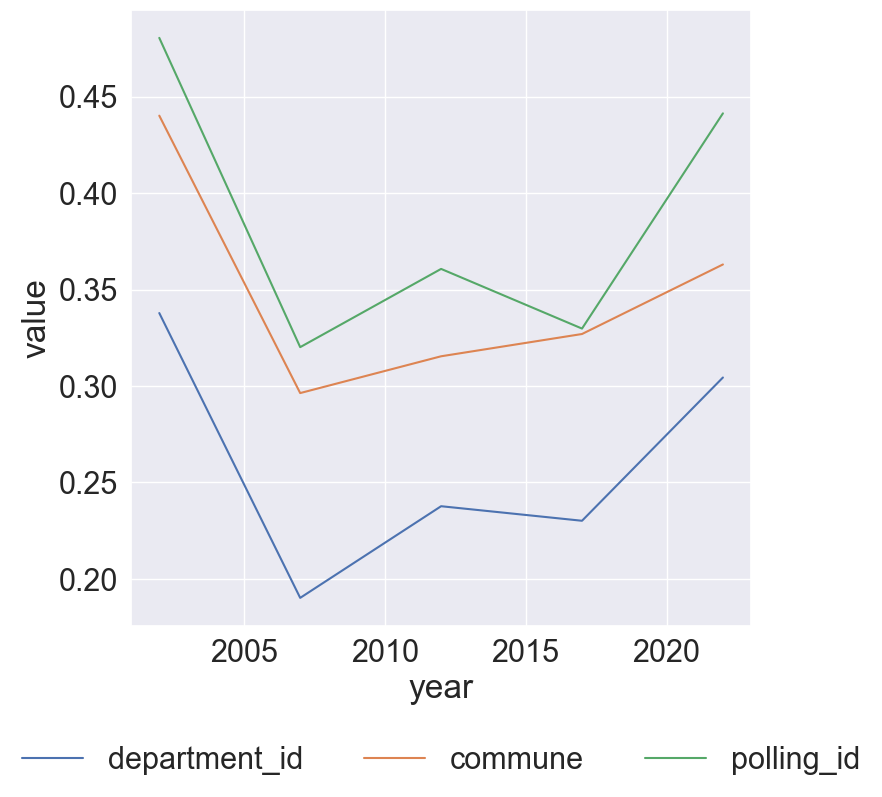

In [ ]:
asd = pd.DataFrame(output)
sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(8, 8))

sns.lineplot(x="year", y="value", hue="unit", data=asd)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          frameon=False, ncol=5)

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'Poverty (%)'),
  Text(0, 1.5, 'Gini'),
  Text(0, 2.5, 'Income for consumption\n(in Euros)'),
  Text(0, 3.5, 'Rurality (%)')])

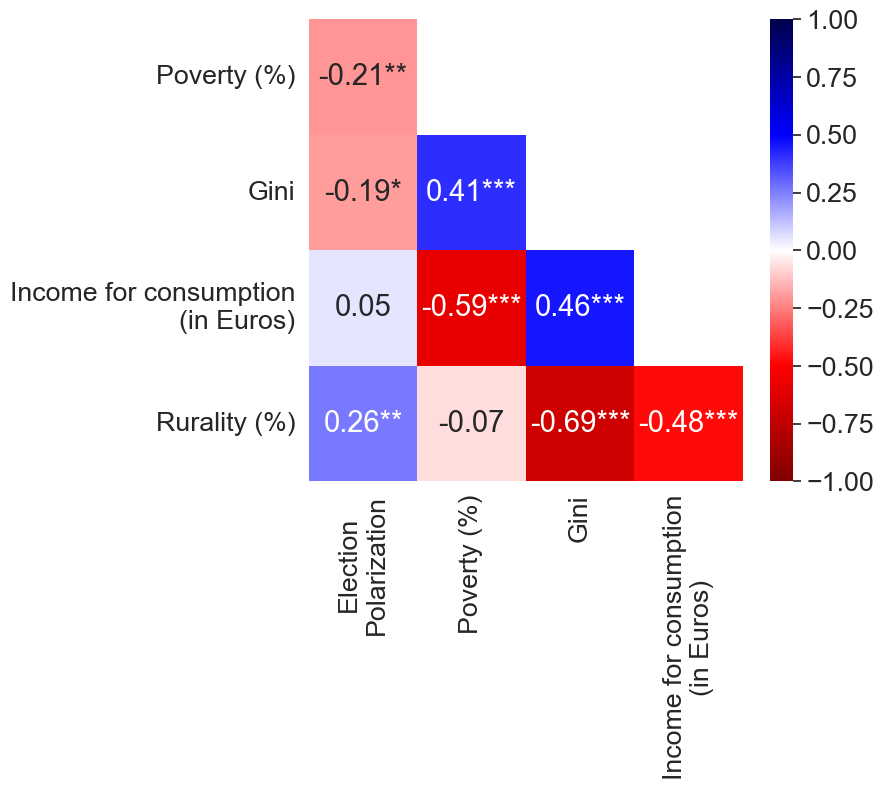

In [ ]:
def set_corr(corr, _):
    corr = round(corr, 3)
    if _ < 0.01:
        return f"{corr}***"
    elif _ < 0.05:
        return f"{corr}**"
    elif _ < 0.1:
        return f"{corr}*"
    return corr

sns.set_style("whitegrid")
sns.set(font_scale=1.75, style="whitegrid")
matplotlib.rc("axes", edgecolor="#000000")
matplotlib.rcParams['axes.grid'] = True

dd = data[["value", "poverty_rate", "gini", "median_household_income", "rurality"]] #, "household_income"
dd = dd.rename(columns={
    "value": "Election\nPolarization",
    "poverty_rate": "Poverty (%)",
    "gini": "Gini",
    "median_household_income": "Income for consumption\n(in Euros)",
    "rurality": "Rurality (%)"
})
dd["Rurality (%)"] = dd["Rurality (%)"].astype(float)

corr_m = dd.corr()
rho = dd.corr()
pval = dd.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)

p = pval.applymap(lambda x: "".join(["*" for t in [0.01, 0.05, 0.1] if x<=t]))
p = rho.round(2).astype(str) + p

p = np.tril(p.values, k=-1)

p[p==0] = np.nan
p = pd.DataFrame(p).dropna(axis=0, how="all").dropna(axis=1, how="all")

labels_m = list(corr_m)
corr_m = np.tril(corr_m.values, k=-1)

corr_m[corr_m==0] = np.nan

fig, ax = plt.subplots(figsize=(7, 6))

heatmap_data = pd.DataFrame(corr_m, index=labels_m, columns=labels_m).round(2)\
                .dropna(axis=0, how="all")\
                .dropna(axis=1, how="all")

g = sns.heatmap(heatmap_data, vmin=-1, vmax=1, annot=p, ax=ax, cmap="seismic_r", fmt="", cbar=True)

g.set_ylim(heatmap_data.shape[0], 0)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

In [ ]:
df_vaccination = pd.read_csv("data_external/France/covid_vaccination.csv", delimiter=";")
df_vaccination = df_vaccination.rename(columns={
    "departement_residence": "department_id",
    "taux_cumu_termine": "people_fully_vaccinated_per_hundred"
})
df_vaccination.head()

,date_reference,semaine_injection,Region_residence,Libelle_region,department_id,libelle_departement,population_insee,classe_age,libelle_classe_age,type_vaccin,...,taux_cumu_1_inj,people_fully_vaccinated_per_hundred,date,Effectif_rappel,Effectif_cumu_rappel,Effectif_rappel_parmi_eligible,Effectif_eligible_au_rappel,TAUX_rappel,TAUX_CUMU_rappel,TAUX_CUMU_rappeleli
0,2022-10-02,2022-39,84,Auvergne-Rhône-Alpes,01,Ain,665391,TOUT_AGE,Tout âge,Tout vaccin,...,0.740,0.733,2022-10-02,120,368760,359460,437070,0.0,0.554,0.822
1,2022-10-02,2022-39,32,Hauts-de-France,02,Aisne,524403,TOUT_AGE,Tout âge,Tout vaccin,...,0.797,0.789,2022-10-02,100,326470,316810,369420,0.0,0.623,0.858
2,2022-10-02,2022-39,84,Auvergne-Rhône-Alpes,03,Allier,331757,TOUT_AGE,Tout âge,Tout vaccin,...,0.822,0.815,2022-10-02,70,221120,215320,246820,0.0,0.667,0.872
3,2022-10-02,2022-39,93,Provence-Alpes-Côte d'Azur,04,Alpes-de-Haute-Provence,165582,TOUT_AGE,Tout âge,Tout vaccin,...,0.725,0.715,2022-10-02,30,90550,88620,109410,0.0,0.547,0.810
4,2022-10-02,2022-39,93,Provence-Alpes-Côte d'Azur,05,Hautes-Alpes,141059,TOUT_AGE,Tout âge,Tout vaccin,...,0.782,0.772,2022-10-02,30,82590,81030,100020,0.0,0.585,0.810


Text(0.65, 0.05, 'ρ = -0.092')

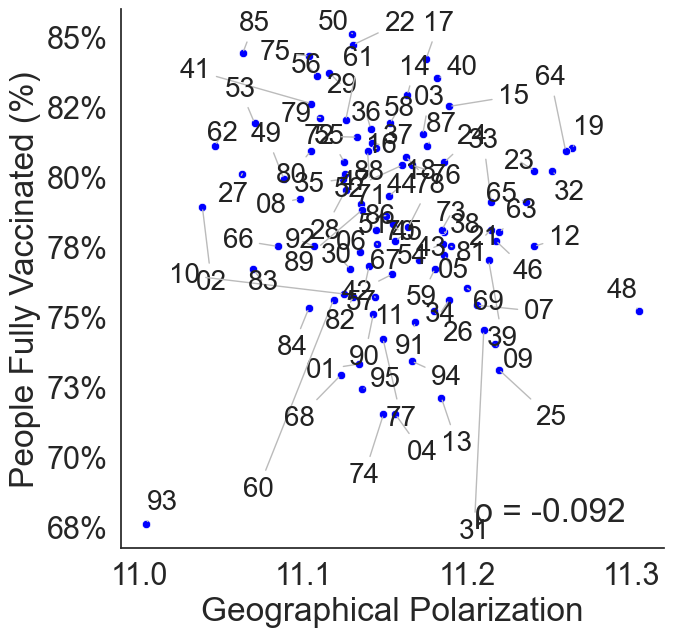

In [ ]:
dd = pd.merge(
    df_dv[df_dv["year"] == 2022],
    df_vaccination,
    on="department_id"
)

sns.set_style("whitegrid")
sns.set(font_scale=2, style="white")

x_value = "value"
y_value = "people_fully_vaccinated_per_hundred"

fig, ax = plt.subplots(figsize=(7, 7))
sns.scatterplot(x=x_value, y=y_value, color="blue", data=dd)
ax.set_xlabel("Geographical Polarization")
ax.set_ylabel("People Fully Vaccinated (%)")

ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

# for x, item in dd.iterrows():
#     ax.text(item["value"], item["turnout"], item["state_po"])
sns.despine()

colors = []
texts = []
for x, item in dd.iterrows():
    color = "#222222"# "#95B0B6"
    colors.append({"arrowstyle": "-", "color": "red"})
    txt = ax.annotate(
        item["department_id"], 
        xy=(item[x_value], item[y_value]), 
        fontsize=20, 
        color=color, 
        arrowprops=dict(arrowstyle="-", color="#BBBBBB")
    )
    texts.append(txt)

adjust_text(texts, lim=200, ax=ax) 

def set_corr(corr, _):
    corr = round(corr, 3)
    if _ < 0.01:
        return f"ρ = {corr}***"
    elif _ < 0.05:
        return f"ρ = {corr}**"
    elif _ < 0.1:
        return f"ρ = {corr}*"

    return f"ρ = {corr}"
corr, _ = pearsonr(dd[x_value], dd[y_value])
ax.text(0.65, 0.05, set_corr(corr, _), transform=ax.transAxes)

In [ ]:
import libpysal

# create weights
W = libpysal.weights.Queen.from_dataframe(aa)

# row-normalise weights
W.transform = "r"

# create lag
aa["averaged_values"] = libpysal.weights.lag_spatial(W, aa["value"])
# aa["averaged_values_1"] = libpysal.weights.lag_spatial(W, aa["value_1"].fillna(0))

NameError: name 'aa' is not defined

In [ ]:
bb = aa.groupby(["department_id", "year"]).agg({"averaged_values": "sum"})
bb["averaged_values_1"] = bb.groupby(level=0)["averaged_values"].shift(1)
bb = bb.reset_index()
aa = pd.merge(aa, bb[["department_id", "year", "averaged_values_1"]], on=["department_id", "year"])
aa

NameError: name 'aa' is not defined

In [ ]:
aa.to_csv("testlag.csv", index=False)

NameError: name 'aa' is not defined

In [ ]:
output = []

for year in [2002, 2007, 2012, 2017, 2022]:
    tmp = pd.read_csv(f"data_output/France/{year}_first_round.csv.gz")
    tmp2 = pd.read_csv(f"data_output/France/{year}_first_round_location.csv.gz")

    tmp = pd.merge(tmp, tmp2[["department_id", "commune_id", "polling_id"]], on="polling_id")
    tmp["department_id"] = tmp["department_id"].astype(str).str.zfill(2)
    tmp = tmp.reset_index().dropna()
    tmp["year"] = year
    
    output.append(tmp)
    
df = pd.concat(output, ignore_index=True)
df.head()

C:\Users\cnava\AppData\Local\Temp\ipykernel_20572\678390794.py:5: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  tmp2 = pd.read_csv(f"data_output/France/{year}_first_round_location.csv.gz")


,index,polling_id,candidate,value,rank,rate,department_id,commune_id,year
0,0,01-1-1,BRUNO MEGRET,14,11,0.032787,01,01001,2002
1,1,01-1-1,CORINNE LEPAGE,9,13,0.021077,01,01001,2002
2,2,01-1-1,DANIEL GLUCKSTEIN,1,16,0.002342,01,01001,2002
3,3,01-1-1,FRANCOIS BAYROU,30,5,0.070258,01,01001,2002
4,4,01-1-1,JACQUES CHIRAC,66,2,0.154567,01,01001,2002


In [ ]:
df.head()

,index,polling_id,candidate,value,rank,rate,department_id,commune_id,year
0,0,01-1-1,BRUNO MEGRET,14,11,0.032787,01,01001,2002
1,1,01-1-1,CORINNE LEPAGE,9,13,0.021077,01,01001,2002
2,2,01-1-1,DANIEL GLUCKSTEIN,1,16,0.002342,01,01001,2002
3,3,01-1-1,FRANCOIS BAYROU,30,5,0.070258,01,01001,2002
4,4,01-1-1,JACQUES CHIRAC,66,2,0.154567,01,01001,2002


C:\Users\cnava\AppData\Local\Temp\ipykernel_20572\954207689.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_location = pd.read_csv(f"data_output/France/2022_first_round_location.csv.gz")


,department_id,electors,abstentions,participation
0,01,438109,97541,0.777359
1,02,373544,101089,0.729379
2,03,249991,58497,0.766004
3,04,128075,29290,0.771306
4,05,113519,25357,0.776628


In [ ]:
gdf = gpd.read_file(f"geo_shapes/France_department.gpkg")
gdf.head()

In [ ]:
gg.sort_values("growth_y", ascending=False)

In [ ]:
dd = df[df["candidate"] == "Marine LE PEN"].pivot_table(index="department_id", columns="year", values="value")

year_curr = 2022
year_prev = 2017
dd["growth"] = (dd[year_curr] - dd[year_prev]) / dd[year_prev]
dd = dd[dd["growth"].notna()].reset_index()
dd.sort_values("growth", ascending=False)

ee = pd.merge(dd, gdf, on="department_id")
ee = gpd.GeoDataFrame(ee)

vmin, vmax, vcenter = ee["growth"].min(), ee["growth"].max(), 0
norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
# create a normalized colorbar
cmap = 'seismic'
cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmap)

fig, ax = plt.subplots(figsize=(10, 10))
ee.plot(
    column="growth",
    lw=0.5,
    edgecolor="#222222",
    legend=True,
    cmap="seismic",
    norm=norm,
    legend_kwds=dict(
        shrink=0.3
    ),
    ax=ax
)

plt.axis("off")

In [ ]:
df.groupby(["department_id"])["value"].pct_change()